# Telco Customer Churn Prediction

Customer churn is a major business problem in the telecom industry.  
In this notebook, I build an end-to-end churn prediction pipeline using
machine learning and optimize it for business impact.


# Importing Required Libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler , OneHotEncoder , LabelEncoder , OrdinalEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.model_selection import cross_val_score , GridSearchCV , StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import pickle

import warnings
warnings.filterwarnings('ignore')

# Dataset Overview
- Rows: 7,043
- Target: Churn (Yes / No)
- Mix of numeric and categorical features

In [ ]:
df = pd.read_csv('/content/Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors='coerce')

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [ ]:
(df['Churn'].value_counts() / len(df)) * 100

,count
Churn,
No,73.463013
Yes,26.536987


In [ ]:
df = df.drop(columns=['customerID'])

In [ ]:
num_features = []
cat_features = []

for col in df.columns:
  if df[col].dtype != 'object':
    num_features.append(col)
  else:
    cat_features.append(col)

print(num_features)
print(cat_features)

['tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


# Univariate Analysis

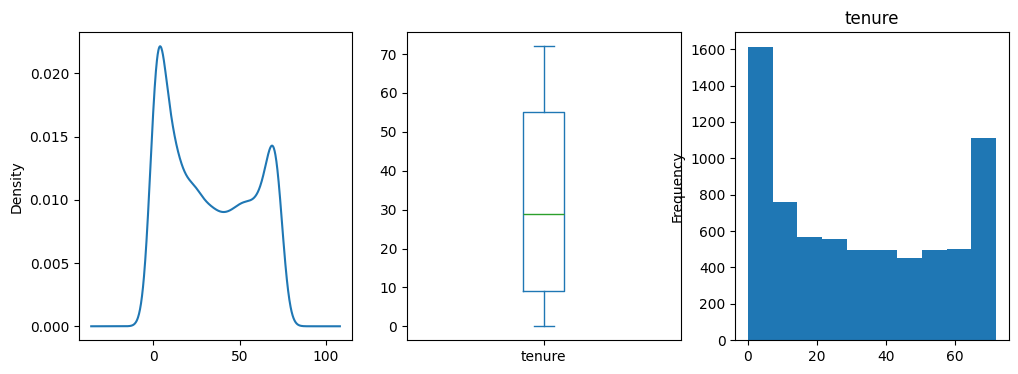

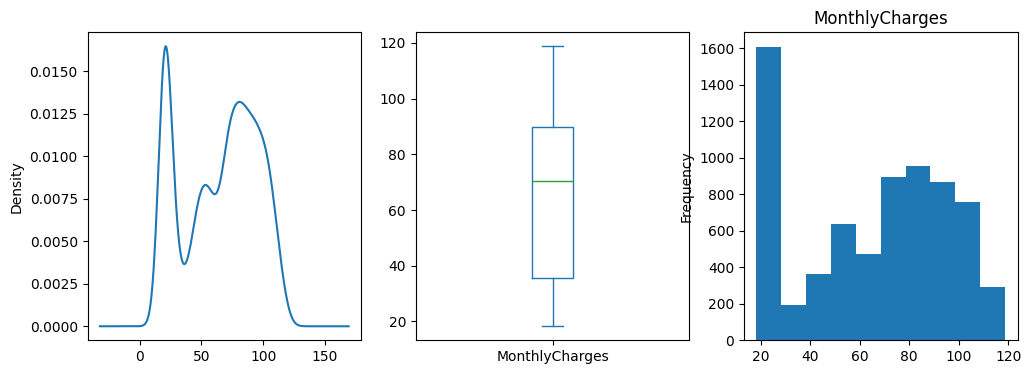

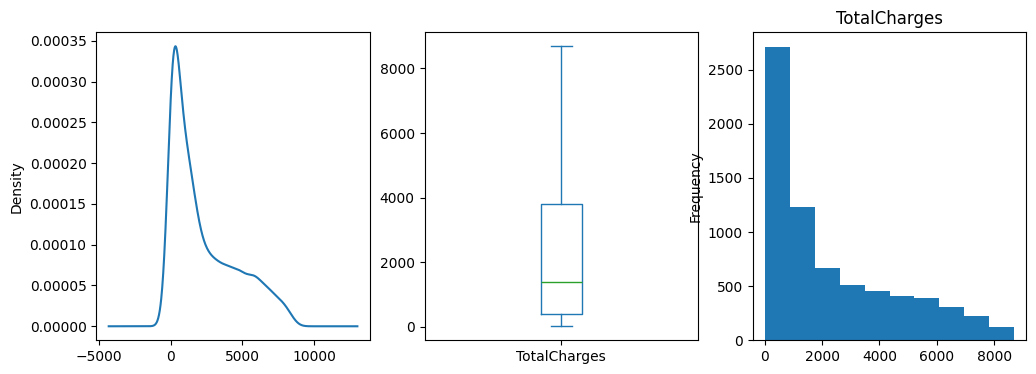

In [ ]:
for col in num_features:
  fig , ax = plt.subplots(1 , 3 , figsize=(12 , 4))
  df[col].plot(kind='kde' , ax=ax[0])
  df[col].plot(kind='box' , ax=ax[1])
  df[col].plot(kind='hist' , ax=ax[2])
  plt.title(col)

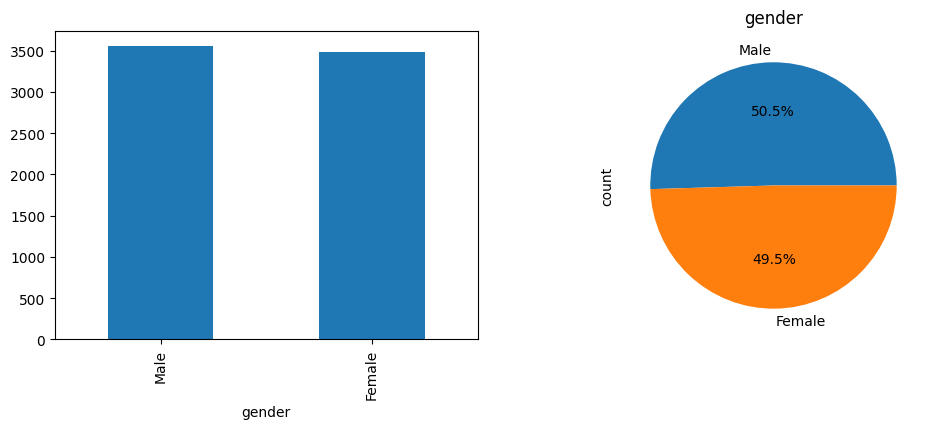

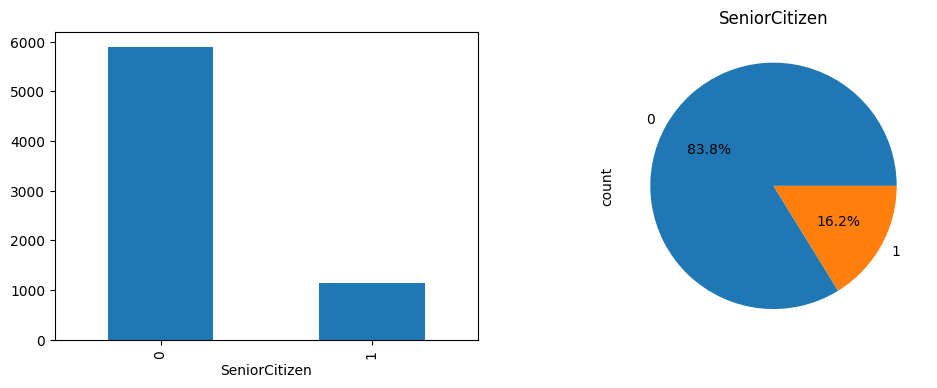

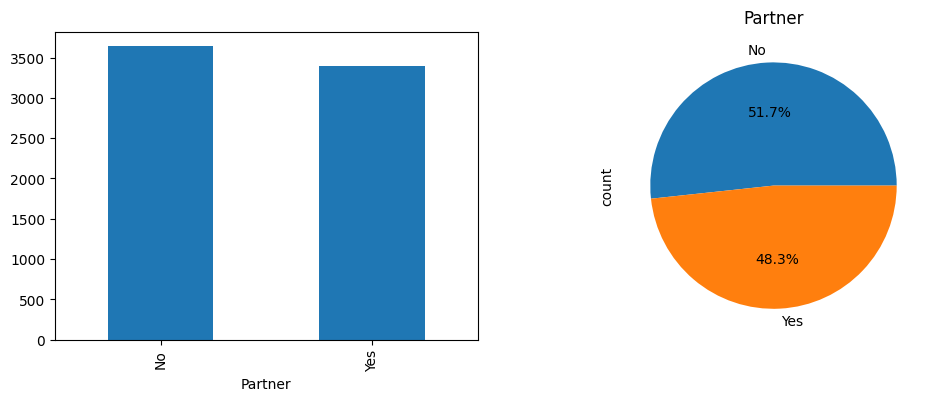

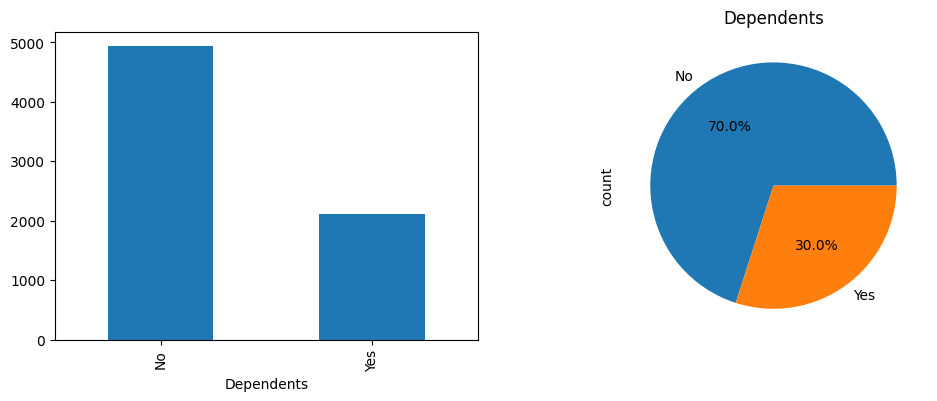

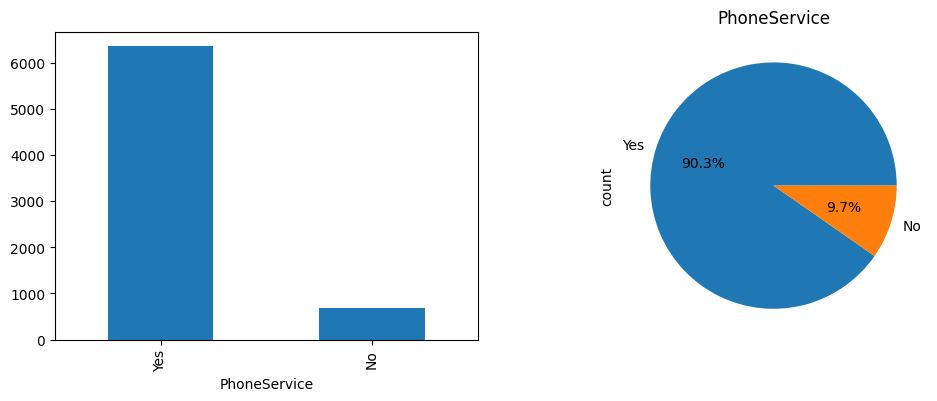

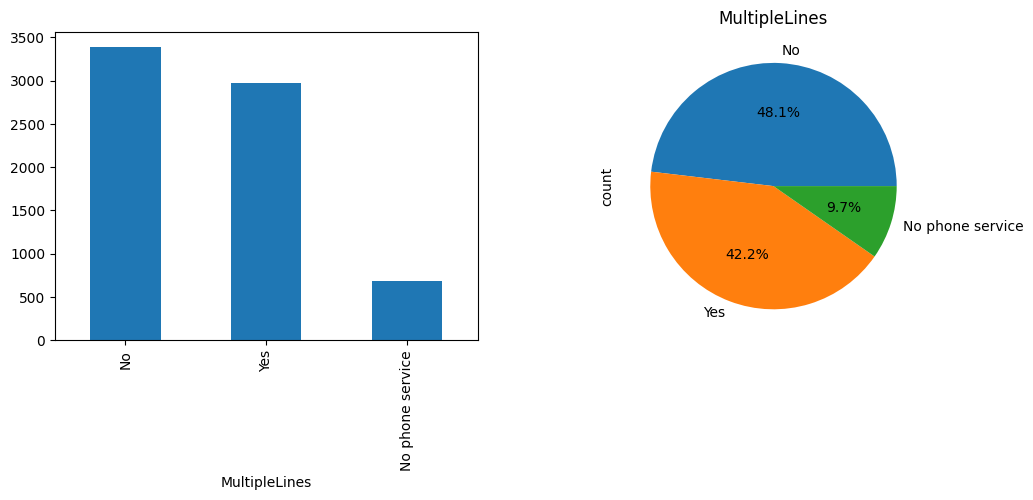

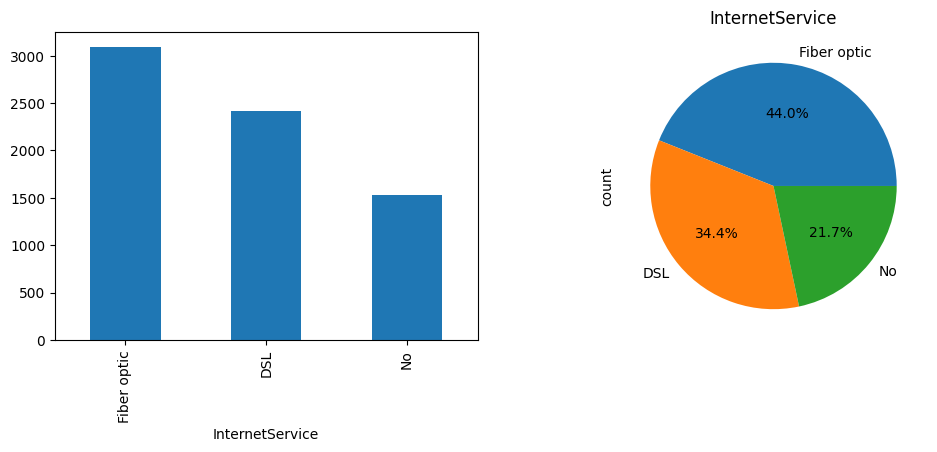

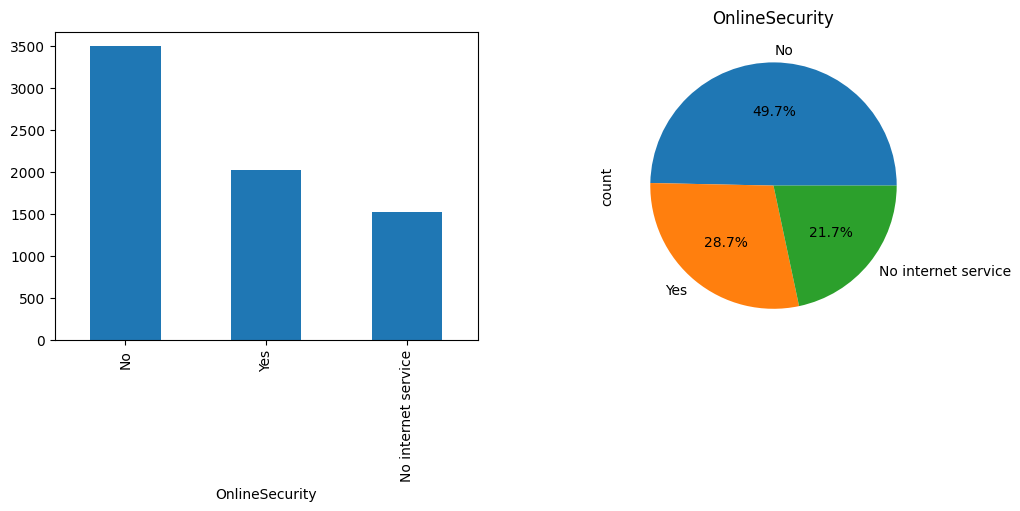

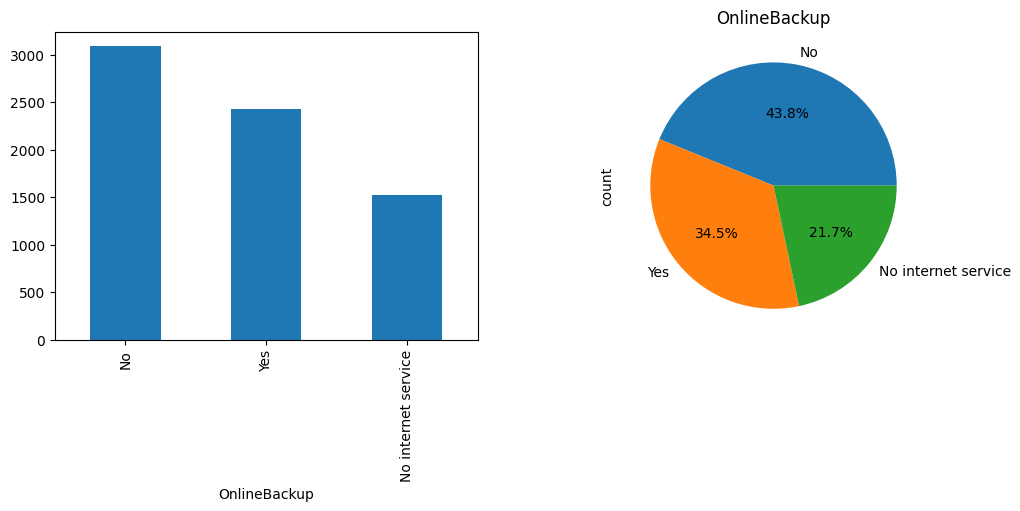

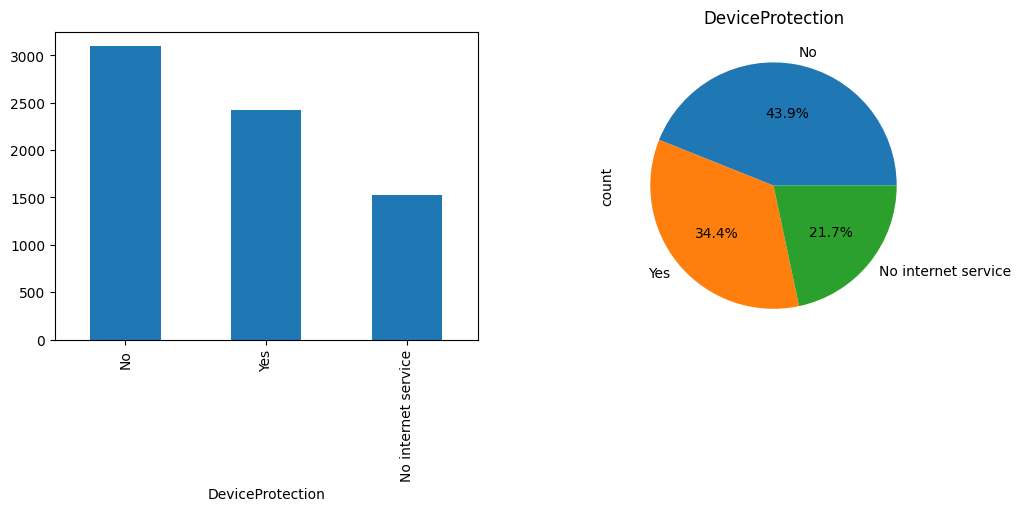

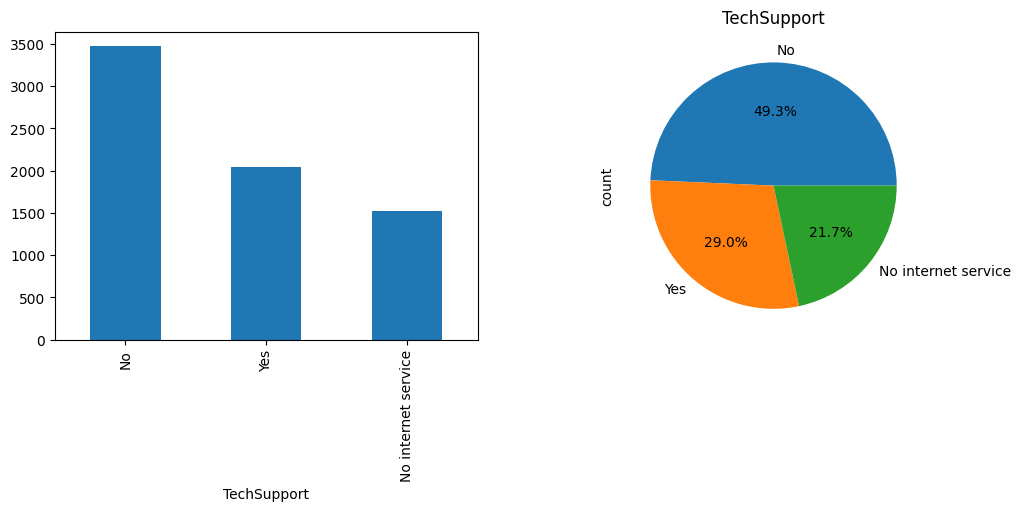

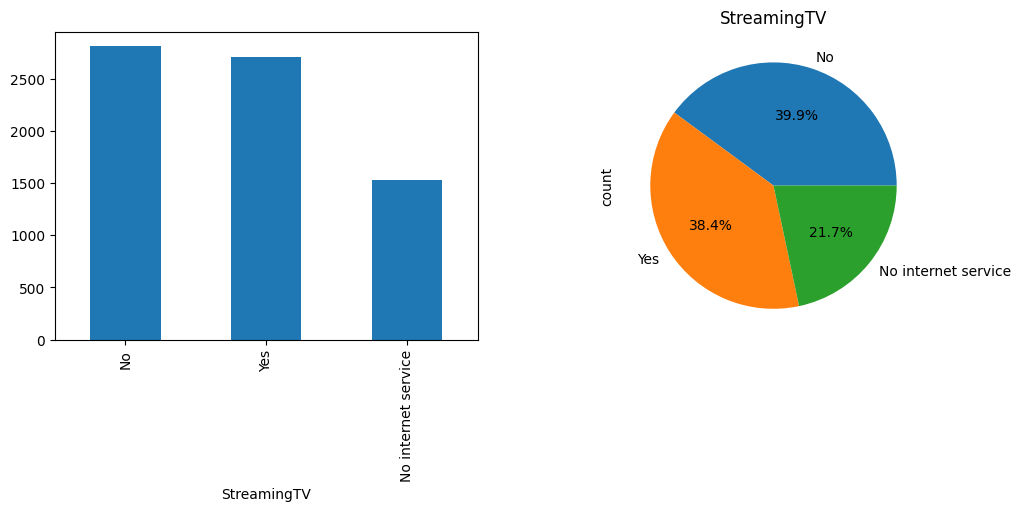

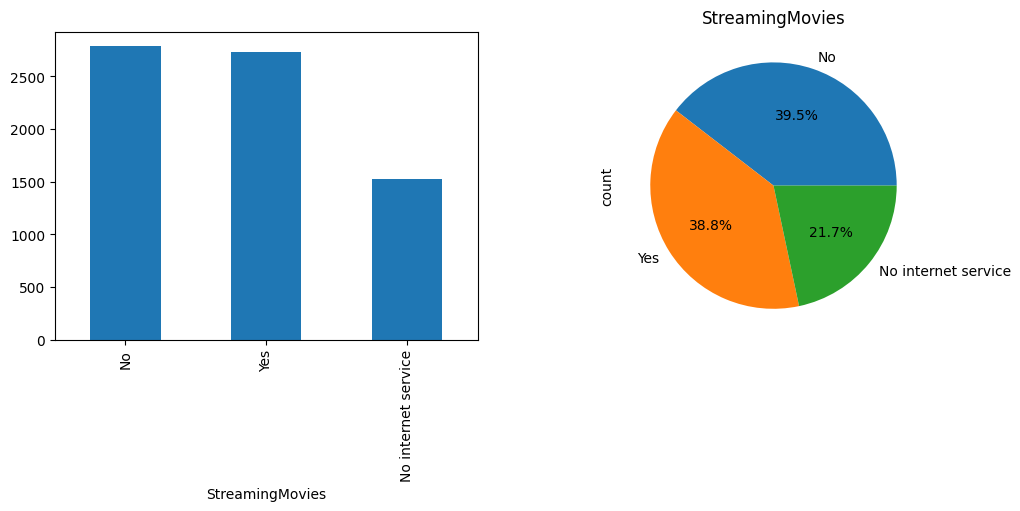

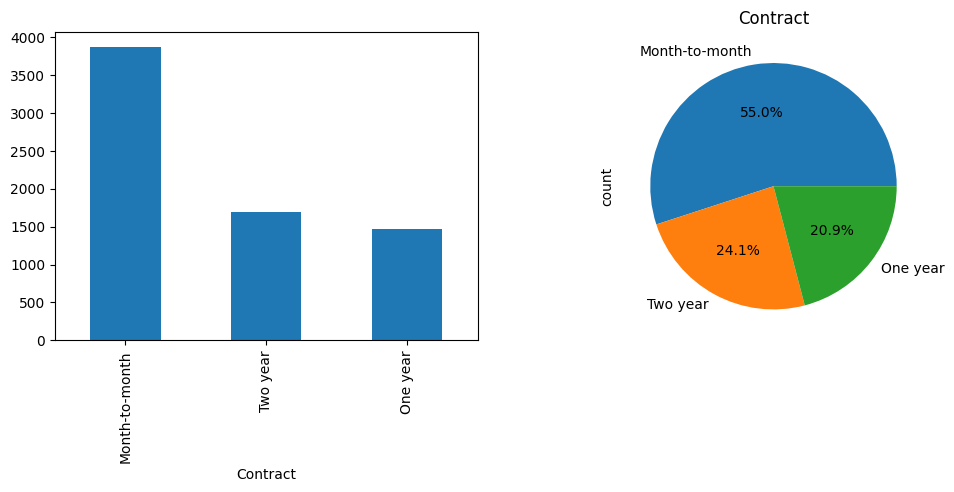

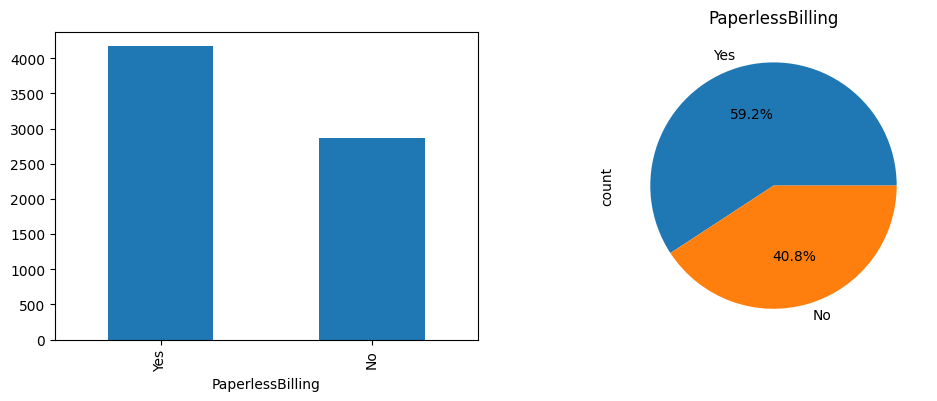

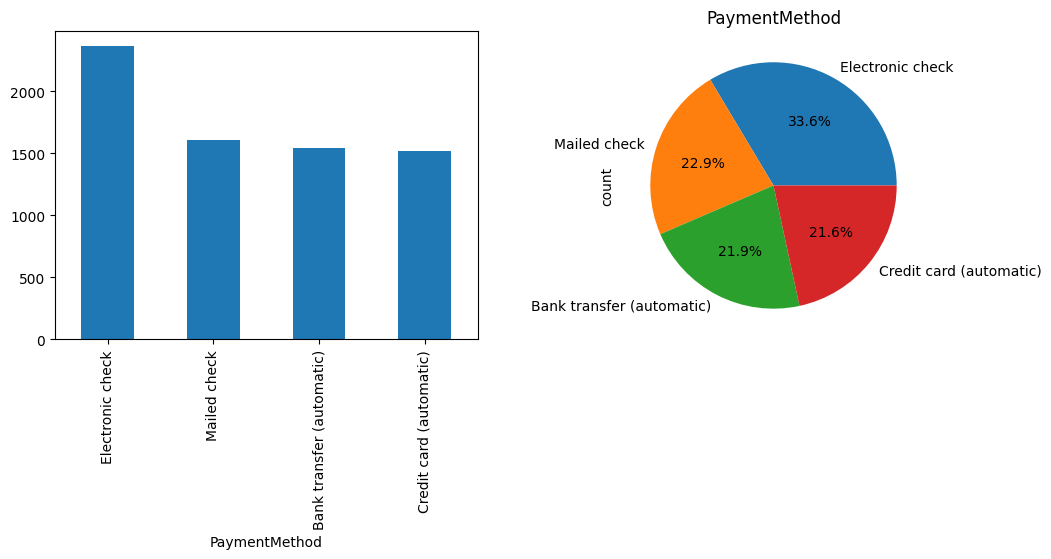

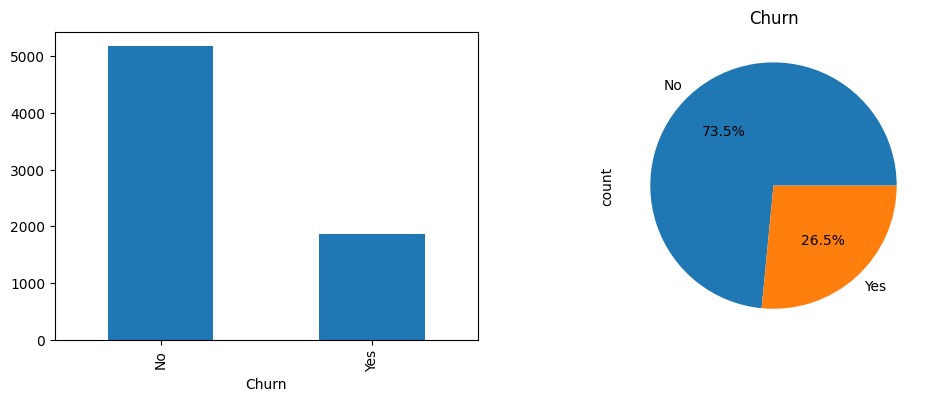

In [ ]:
for col in cat_features:
  fig , ax = plt.subplots(1 , 2 , figsize=(12 , 4))
  df[col].value_counts().plot(kind='bar' , ax=ax[0])
  df[col].value_counts().plot(kind='pie' , ax=ax[1] , autopct='%1.1f%%')
  plt.title(col)

# Y-data Profiling

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(
    df,
    title="Pandas Profiling Report",
    explorative=True
)

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:00<00:00, 22.49it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Preprocessing

- Missing values handled using median imputation
- Numerical features scaled
- Categorical features encoded using:
  - Ordinal encoding for ordered categories
  - One-hot encoding for nominal categories


In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

binary_cols = [
    'gender','Partner','Dependents',
    'PhoneService','PaperlessBilling'
]

onehot_cols = [
    'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaymentMethod'
]

ordinal_cols = ['Contract']

num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

binary_pipeline = Pipeline(
    steps=[
        ('encoder', OrdinalEncoder())
    ]
)

ordinal_pipeline = Pipeline(
    steps=[
        ('encoder', OrdinalEncoder(
            categories=[['Month-to-month','One year','Two year']]
        ))
    ]
)

onehot_pipeline = Pipeline(
    steps=[
        ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('binary', binary_pipeline, binary_cols),
        ('ordinal', ordinal_pipeline, ordinal_cols),
        ('onehot', onehot_pipeline, onehot_cols)
    ]
)

# Train Test Split

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)


# Model Building Strategy

I trained multiple models and evaluated them using ROC-AUC and Recall
since churn is an imbalanced classification problem.


In [ ]:
param_grid_lr = {
    'classifier__penalty': ['l1' , 'l2'],
    'classifier__C': [0.01, 0.05, 0.1, 0.5, 1, 5]
}

param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 0.01, 0.1],
    'classifier__kernel': ['rbf']
}

param_grid_rf = {
    'classifier__n_estimators': [300, 500],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 10],
    'classifier__min_samples_leaf': [1, 5]
}

param_grid_xgb = {
    'classifier__n_estimators': [300, 500],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.03, 0.05, 0.1],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

## Churn data is imbalanced, so we used:
- class_weight='balanced' for sklearn models
- scale_pos_weight for XGBoost


In [ ]:
model_lr = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000 , class_weight='balanced' , solver='liblinear'))
    ]
)

# model_knn = Pipeline(
#     steps=[
#         ('preprocessor', preprocessor),
#         ('classifier', KNeighborsClassifier())
#     ]
# )

# model_dt = Pipeline(
#     steps=[
#         ('preprocessor', preprocessor),
#         ('classifier', DecisionTreeClassifier(
#             class_weight='balanced',
#             random_state=42
#         ))
#     ]
# )

model_rf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]
)

model_svm = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC(
              probability=True,
              class_weight='balanced'
        ))
    ]
)

neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

scale_pos_weight = neg / pos

model_xgb = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(scale_pos_weight=scale_pos_weight , eval_metric='logloss',))
    ]
)

# Model Evaluation

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def run_grid_search(model, param_grid, X_train, y_train_enc, name):
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train_enc)

    print(f"\n{name} BEST ROC-AUC: {grid.best_score_}")
    print(f"{name} BEST PARAMS: {grid.best_params_}")

    return grid.best_estimator_

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_test, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-"*50)

In [ ]:
best_lr = run_grid_search(model_lr, param_grid_lr, X_train, y_train, "Logistic Regression")

best_svm = run_grid_search(model_svm, param_grid_svm, X_train, y_train, "SVM")

best_rf = run_grid_search(model_rf, param_grid_rf, X_train, y_train, "Random Forest")

best_xgb = run_grid_search(model_xgb, param_grid_xgb, X_train, y_train, "XGBoost")


Fitting 5 folds for each of 12 candidates, totalling 60 fits

Logistic Regression BEST ROC-AUC: 0.8462012619157011
Logistic Regression BEST PARAMS: {'classifier__C': 5, 'classifier__penalty': 'l2'}
Fitting 5 folds for each of 9 candidates, totalling 45 fits

SVM BEST ROC-AUC: 0.845010471811056
SVM BEST PARAMS: {'classifier__C': 1, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Random Forest BEST ROC-AUC: 0.8465765272910921
Random Forest BEST PARAMS: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 500}
Fitting 5 folds for each of 48 candidates, totalling 240 fits

XGBoost BEST ROC-AUC: 0.8487863919146964
XGBoost BEST PARAMS: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.03, 'classifier__max_depth': 3, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}


# Baseline Models

| Model | ROC-AUC |
|------|--------|
| Logistic Regression | 0.846 |
| Random Forest | 0.846 |
| XGBoost | 0.848 |
| SVM | 0.845 |

In [ ]:
# print("K-Nearest Neighbors")
# evaluate_model(model_knn, X_test, y_test)

# print("Decision Tree")
# evaluate_model(model_dt, X_test, y_test)

print("Tuned Logistic Regression")
evaluate_model(best_lr, X_test, y_test)

print("Tuned SVM")
evaluate_model(best_svm, X_test, y_test)

print("Tuned Random Forest")
evaluate_model(best_rf, X_test, y_test)

print("Tuned XGBoost")
evaluate_model(best_xgb, X_test, y_test)

Tuned Logistic Regression
Accuracy : 0.7345635202271115
Precision: 0.5
Recall   : 0.7834224598930482
F1-score : 0.6104166666666667
ROC-AUC  : 0.8398641142886667
Confusion Matrix:
 [[742 293]
 [ 81 293]]
--------------------------------------------------
Tuned SVM
Accuracy : 0.7224982256919801
Precision: 0.4864864864864865
Recall   : 0.8181818181818182
F1-score : 0.6101694915254238
ROC-AUC  : 0.8387920121935468
Confusion Matrix:
 [[712 323]
 [ 68 306]]
--------------------------------------------------
Tuned Random Forest
Accuracy : 0.7700496806245565
Precision: 0.5477099236641222
Recall   : 0.767379679144385
F1-score : 0.6391982182628062
ROC-AUC  : 0.8426024955436721
Confusion Matrix:
 [[798 237]
 [ 87 287]]
--------------------------------------------------
Tuned XGBoost
Accuracy : 0.7444996451383961
Precision: 0.511986301369863
Recall   : 0.7994652406417112
F1-score : 0.6242171189979123
ROC-AUC  : 0.8454312950476633
Confusion Matrix:
 [[750 285]
 [ 75 299]]
--------------------------

# Threshold Optimization

Instead of using the default 0.5 threshold, we optimized it to
maximize churn recall.


In [ ]:
y_prob = best_rf.predict_proba(X_test)[:,1]

for t in np.arange(0.3, 0.51, 0.05):
    y_pred = (y_prob >= t).astype(int)
    print(
        f"Threshold {t:.2f} | "
        f"Recall {recall_score(y_test, y_pred):.3f} | "
        f"Precision {precision_score(y_test, y_pred):.3f}"
    )

Threshold 0.30 | Recall 0.877 | Precision 0.445
Threshold 0.35 | Recall 0.858 | Precision 0.477
Threshold 0.40 | Recall 0.826 | Precision 0.499
Threshold 0.45 | Recall 0.797 | Precision 0.521
Threshold 0.50 | Recall 0.767 | Precision 0.548


In [ ]:
y_prob = best_xgb.predict_proba(X_test)[:,1]

for t in np.arange(0.3, 0.51, 0.05):
    y_pred = (y_prob >= t).astype(int)
    print(
        f"Threshold {t:.2f} | "
        f"Recall {recall_score(y_test, y_pred):.3f} | "
        f"Precision {precision_score(y_test, y_pred):.3f}"
    )

Threshold 0.30 | Recall 0.912 | Precision 0.437
Threshold 0.35 | Recall 0.888 | Precision 0.455
Threshold 0.40 | Recall 0.861 | Precision 0.477
Threshold 0.45 | Recall 0.826 | Precision 0.494
Threshold 0.50 | Recall 0.799 | Precision 0.512


## Final Model

- Model: XGBoost
- Threshold: 0.35
- Recall: ~89%
- ROC-AUC: ~0.85


# Saving model using Pickel

In [ ]:
final_xgb_artifact = {
    "model": best_xgb,
    "threshold": 0.35,
    "label_encoder": le
}

In [ ]:
with open("xgb_churn_model.pkl", "wb") as f:
    pickle.dump(final_xgb_artifact, f)


# Model Performance Comparison (Tuned Models)

| Model | Accuracy | Precision | Recall | F1-score | ROC-AUC |
|------|----------|-----------|--------|----------|---------|
| Logistic Regression | 0.735 | 0.500 | 0.783 | 0.610 | 0.840 |
| SVM | 0.722 | 0.486 | **0.818** | 0.610 | 0.839 |
| Random Forest | **0.770** | **0.548** | 0.767 | **0.639** | 0.843 |
| XGBoost | 0.744 | 0.512 | 0.799 | 0.624 | **0.845** |


# Key Observations
- SVM achieves the highest recall, making it effective at identifying churners.
- Random Forest provides the best balance between precision and recall (highest F1-score).
- XGBoost achieves the highest ROC-AUC, indicating the strongest overall class separation.
- Accuracy alone is misleading due to class imbalance; recall and ROC-AUC are more relevant for churn.
